In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

sns.set_style('whitegrid')

In [2]:
with open('train_data.json', 'r', encoding='utf-8') as file:
    train_data_json = json.load(file)
train_data = pd.DataFrame(train_data_json)

with open('test_data.json', 'r', encoding='utf-8') as file:
    test_data = json.load(file)
#test_data = pd.DataFrame(test_data)

In [3]:
# одна вакансия, нужно отранжировать 113 резюме в тестовой выборке
len(test_data['resumes'])

113

In [4]:
train_data.head()

,vacancy,failed_resumes,confirmed_resumes
0,{'uuid': '779f3a59-206a-3241-adc4-d7db504f960b...,[{'uuid': '74392e00-ecfb-335b-9fc1-c2652dca06e...,[{'uuid': '8c8cf797-2c6b-3f4b-b28b-20d57bd88b8...
1,{'uuid': '7a4813fc-43bc-3896-a607-4c8682b01002...,[{'uuid': '254487e1-81ba-3f2b-9f15-eba98d891ef...,[{'uuid': '23ca55a4-2257-3cbc-a34f-d5e1b98d8c2...
2,{'uuid': 'c03085c3-9b1e-3564-bb1e-59aa72e5fbca...,[{'uuid': '8746a855-022c-34d4-9b55-58da5483c25...,[{'uuid': '95cd87f6-0495-36e5-adad-0782a1ac435...
3,{'uuid': 'a8dd83c3-178d-3c70-90c2-7c3648f6b96a...,[{'uuid': '557c9b5b-9707-360b-bb1f-18c3c1b9439...,[{'uuid': '077836a8-16a8-34f1-a192-fe82ebc8bc9...
4,{'uuid': '9d98eba0-13bb-38d3-b742-4fd445954b3d...,[{'uuid': '821b6466-f3e2-37c9-b44f-676d91bde04...,[{'uuid': '2e517375-ff7d-3781-ae5c-2b0784dbc2b...


In [15]:
print('Всего вакансий', train_data.shape[0])

Всего вакансий 29


Есть много неструктурностей. Например, в графа educationalItem faculty люди кто-то написал "заочный", хотя имелось в виду очевидно не это. 

! Есть описания на английском. 

Графа keywords пуста в каждой вакансии в тренировочном датасете и заполена в тестовом.

In [33]:
# как выглядит список резюме для каждой вакансии
train_data.loc[0,'confirmed_resumes']

[{'uuid': '8c8cf797-2c6b-3f4b-b28b-20d57bd88b82',
  'first_name': 'Марк',
  'last_name': 'Силин',
  'birth_date': '1987-01-01',
  'country': 'Россия',
  'city': 'Великий Новгород',
  'about': None,
  'key_skills': 'Java, Java Spring Framework, Hibernate, Git, PostgreSQL, REST, Camunda, Apache Kafka, Spring Boot',
  'experienceItem': [{'starts': '2022-02-01',
    'ends': None,
    'employer': 'ОАО ЭлектроАвтоТяж',
    'city': 'Коломна',
    'position': 'java-разработчик',
    'description': ' Проекты: Внутренний продукт  а по заказу инструментов разработки для сотрудников; Команда состояла из владельца продукта, аналитика, 4 бэкенд разработчиков, 4 фронтенд разработчиков, 1 тестер. Что делал на проектах: Спроектировал и реализовал новые методы REST API, разрабатывал новый бизнес функционал, исправлял баги; Создавал новые микро-сервисы на SpringBoot, покрыл их тестами и передал пользователям; Покрыл проект юнит-тестами с использованием jUnit, Mockito; Работал в команде, проходил и провод

In [5]:
# на всякий случай: если ли тестовая вакансия среди трейн части

uuids = train_data['vacancy'].apply(lambda x: x['uuid'])
test_data['vacancy']['uuid'] in uuids # тестовой вакансии нет в трейн части

False

In [20]:
def parse_names(df):
    vacancies_names = []
    pass

vacancies_names = train_data['vacancy'].apply(lambda x: x['name'])
vacancies_names

0                   Java разработчик команда Инвестиции
1                                    Системный аналитик
2                         Ведущий/ Главный аналитик DWH
3                                    Системный аналитик
4                                       Product manager
5                                        Java developer
6                    Системный аналитик комманда Залоги
7                               Senior Java-разработчик
8                                        DevOps инженер
9                             Системный аналитик финтех
10                    Ведущий разработчик ETL "Hadoop" 
11                                          Тестировщик
12                                     ИТ-Лидер команды
13                                Аналитик DWH "Hadoop"
14                                               DevOps
15                Архитектор/Системный аналитик DWH ДИР
16                                ETL Разработчик (ДИР)
17                                      Product 

Все вакансии из IT-сферы, поэтому в описаниях встречается много ключевых слов (например, навыки, названия рабочих мест и т.д.)

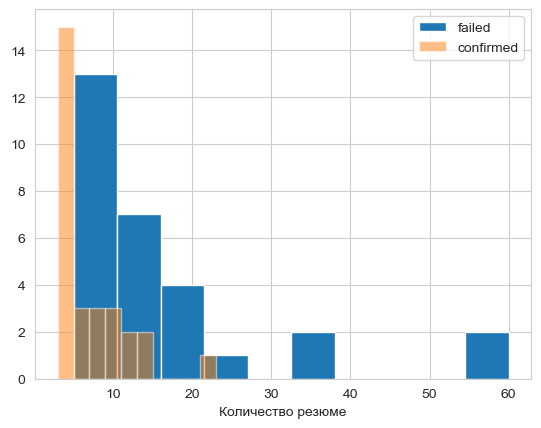

In [131]:
# Распределение количества резюме на вакансию
len_failed = train_data['failed_resumes'].apply(len)
len_confirmed = train_data['confirmed_resumes'].apply(len)

plt.hist(len_failed, label = 'failed');
plt.hist(len_confirmed, alpha = 0.5, label = 'confirmed')
plt.legend()
plt.xlabel('Количество резюме');

В основном на каждую вакансию приходится не больше 40 резюме (как откланенных, так и принятых). Более того, отклоненных резюме гораздо больше, поэтому есть дисбаланс классов.

NB! Среди вузов встречаются топовые и другие. Возможно, это важный фактор при скрининге резюме.